**Exploratory Data Analysis**

Jacqueline Simeone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./clean_data/inner_merge_data.csv')

In [3]:
df.columns

Index(['county_state', 'county', 'state', 'fips', 'svi_ctgy', 'metro_status',
       'census2019', 'census_pct_65plus', 'census_pct_18to64',
       'dose1_pct_030121', 'series_complete_pct_030121',
       'booster_doses_pct_030121', 'dose1_pct_090121',
       'series_complete_pct_090121', 'booster_doses_pct_090121',
       'dose1_pct_030122', 'series_complete_pct_030122',
       'booster_doses_pct_030122', 'null_pct', 'uninsured_pct', 'socio_wgt',
       'hh_wgt', 'minority_wgt', 'housing_wgt', 'overall_wgt',
       'pct_hesitant_02-24-22', 'pct_somewhat_hesitant_02-24-22',
       'pct_highly_hesitant_02-24-22', 'candidate_won', 'winner_votes',
       'total_votes', 'pct_trump', 'pct_biden'],
      dtype='object')

uninsured % vs % hesitant,  hue = trump %

clear relationship with increasing trump support, uninsured %, and hesitant % moving in same direction

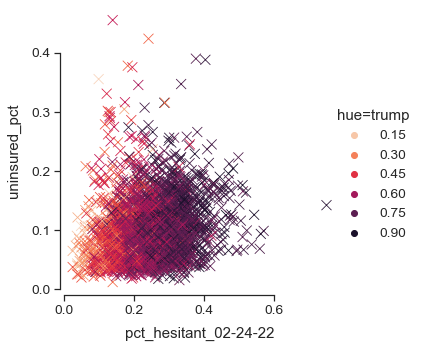

In [4]:
sns.set_theme(style="ticks", font_scale=1.25)
j = sns.relplot(
    data=df,
    x='pct_hesitant_02-24-22', y='uninsured_pct', hue='pct_trump',
    palette='rocket_r', marker="x", s=100
)
j.set_axis_labels('pct_hesitant_02-24-22', 'uninsured_pct', labelpad=10)
j.legend.set_title("hue=trump")
#j.ax.margins(.05)
j.despine(trim=True);

Next 2 have same ys and xs; y= booster doses pcnt 03/22 x = svi_ctgy

their different hues are candidate won and metro status

/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 60.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


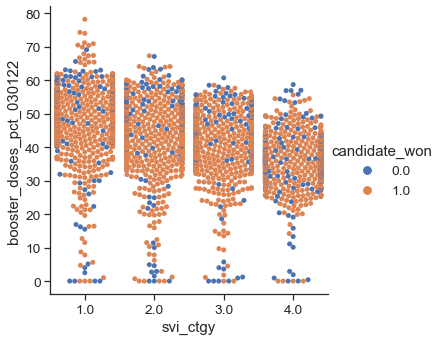

In [5]:
sns.catplot(data=df, kind="swarm", x="svi_ctgy", y='booster_doses_pct_030122', hue='candidate_won')

/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


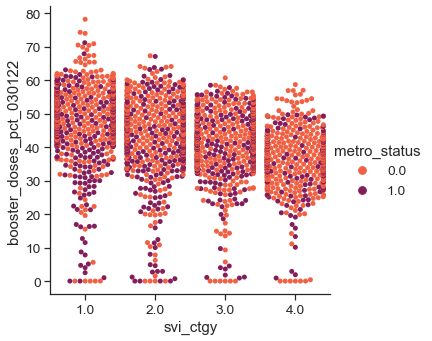

In [6]:
sns.catplot(data=df, kind="swarm", x="svi_ctgy", y='booster_doses_pct_030122', hue="metro_status", palette='rocket_r' )

CLEAR relationship between hesitation, series completeness and political affiliation!!

size = 'pct_biden' because way more republican counties - looks better

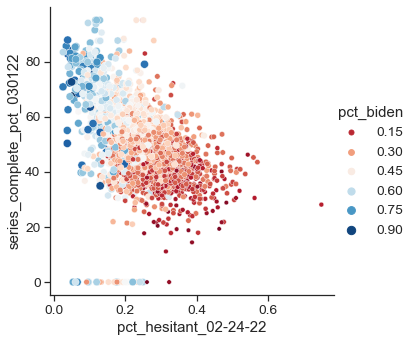

In [13]:
#need to add background color

sns.relplot(
    data=df,
    x='pct_hesitant_02-24-22', y='series_complete_pct_030122', size='pct_biden', palette='RdBu', hue='pct_biden'
)

Next three are all y=dose 1 pct 03/2021 and x= dose 1 pct 09/2021... each has different hues

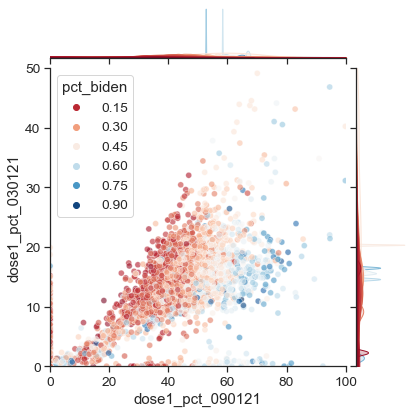

In [8]:
#plot gridlines
sns.jointplot(data=df, y='dose1_pct_030121', x='dose1_pct_090121', alpha=.6, hue='pct_biden', palette='RdBu', xlim=(0,100), ylim=(0,50))


comparing red/blue counties in time 03/21, 09/21, & 03/22 for series and dose 1 completeness

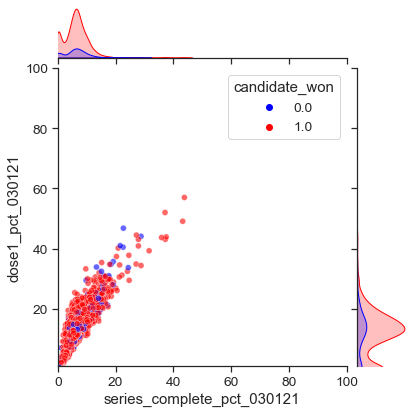

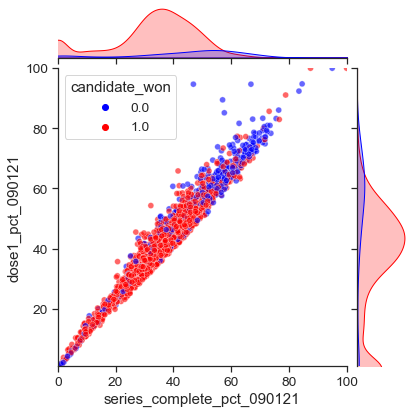

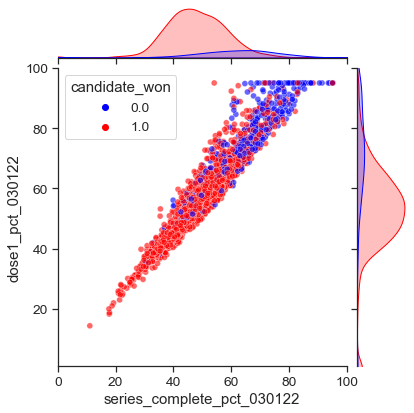

In [12]:
palette = {0:'Blue',1:'Red'}
sns.jointplot(data=df, y='dose1_pct_030121', x='series_complete_pct_030121', alpha=.6, hue='candidate_won', palette=palette, xlim=(0,100), ylim=(1,100))
sns.jointplot(data=df, y='dose1_pct_090121', x='series_complete_pct_090121', alpha=.6, hue='candidate_won', palette=palette, xlim=(0,100), ylim=(1,100))
sns.jointplot(data=df, y='dose1_pct_030122', x='series_complete_pct_030122', alpha=.6, hue='candidate_won', palette=palette, xlim=(0,100), ylim=(1,100))


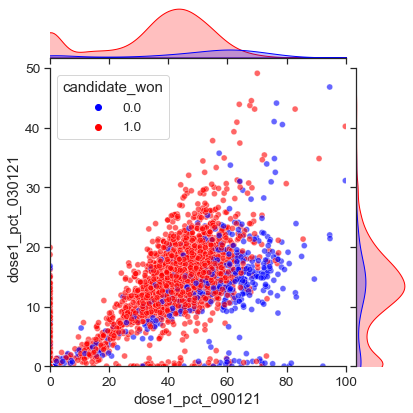

In [10]:
#plot gridlines
#could be interesting to create purple class here - too many red counties
palette = {0:'Blue',1:'Red'}
sns.jointplot(data=df, y='dose1_pct_030121', x='dose1_pct_090121', alpha=.6, hue='candidate_won', palette=palette, xlim=(0,100), ylim=(0,50));

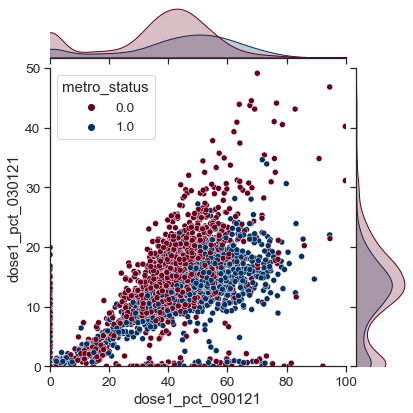

In [11]:
#plot gridlines
sns.jointplot(data=df, y='dose1_pct_030121', x='dose1_pct_090121', palette='RdBu', hue='metro_status', xlim=(0,100), ylim=(0,50));

vax hesitancy blue, purple, red

In [64]:
def label_party(row):
   if row['pct_trump'] <= .45 :
      return 'Blue'
   if row['pct_trump'] > .45 and row['pct_trump'] < .55 :
      return 'Purple'
   if row['pct_trump'] >= .55 :
      return 'Red'
    
df['purple'] = df.apply(lambda row: label_party(row), axis=1)

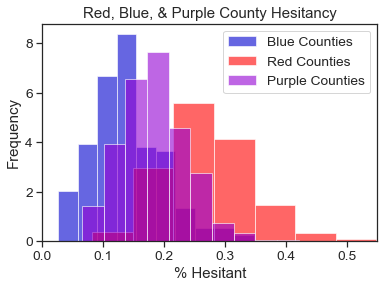

In [88]:
x1 = df[df['purple']=='Blue']['pct_hesitant_02-24-22']
x2 = df[df['purple']=='Red']['pct_hesitant_02-24-22']
x3 = df[df['purple']=='Purple']['pct_hesitant_02-24-22']



plt.hist(x1, alpha=0.6, color='mediumblue', label='Blue Counties', density=True)
plt.hist(x2, alpha=0.6, color='red', label='Red Counties',density=True)
plt.hist(x3, alpha=0.6, color='darkviolet', label='Purple Counties',density=True)
plt.gca().set(title='Red, Blue, & Purple County Hesitancy', ylabel='Frequency', xlabel='% Hesitant')
plt.xlim(0,.55)
plt.legend();

Top vax positive, top vax negative states - counts and maybe map with them?

In [109]:
#df with hesitancy averages for states & df with county_state and pct hesitancy
hesitance_state = pd.DataFrame(df.copy().groupby('state')['pct_hesitant_02-24-22'].mean())
hesitance_counties = df.copy()[['county_state','pct_hesitant_02-24-22']]

hesitance_state = hesitance_state.sort_values(by=['pct_hesitant_02-24-22'])
hesitance_state.reset_index(inplace=True)

hesitance_counties = hesitance_counties.sort_values(by=['pct_hesitant_02-24-22'])

In [124]:
top_county_hes = hesitance_counties.tail(22)
bottom_county_hes = hesitance_counties.head(20)
top_state_hes = hesitance_state.tail(10)
bottom_state_hes = hesitance_state.head(10)

In [131]:
top_county_hes = top_county_hes.drop([88, 823])